In [1]:
import pandas as pd

In [19]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.1 MB/s eta 0:00:00


In [35]:
df = pd.read_csv('engagements.csv')
df.head()

print(df['media_id'].nunique())


355



Top 10 Mentions:
 mentions
@treehut                406
@colleen_stevenson76     13
@ultabeauty              10
@_                       10
@paulreactss              9
@woodsyamphibian          9
@mariebucksland           9
@kiralee725               8
@ndnmomma782024           8
@sabrina_86               8
Name: count, dtype: int64

Top Weekly Keywords:
   week                                       top_keywords
0     9  [(I, 71), (the, 47), (this, 32), (it, 30), (yo...
1    10  [(I, 320), (the, 206), (this, 168), (it, 160),...
2    11  [(I, 303), (the, 214), (this, 170), (to, 163),...
3    12  [(PR, 4132), (TreeHut, 2084), (Treehut, 1462),...
4    13  [(PR, 355), (I, 295), (TreeHut, 190), (the, 17...
5    14  [(I, 492), (this, 424), (it, 218), (to, 196), ...


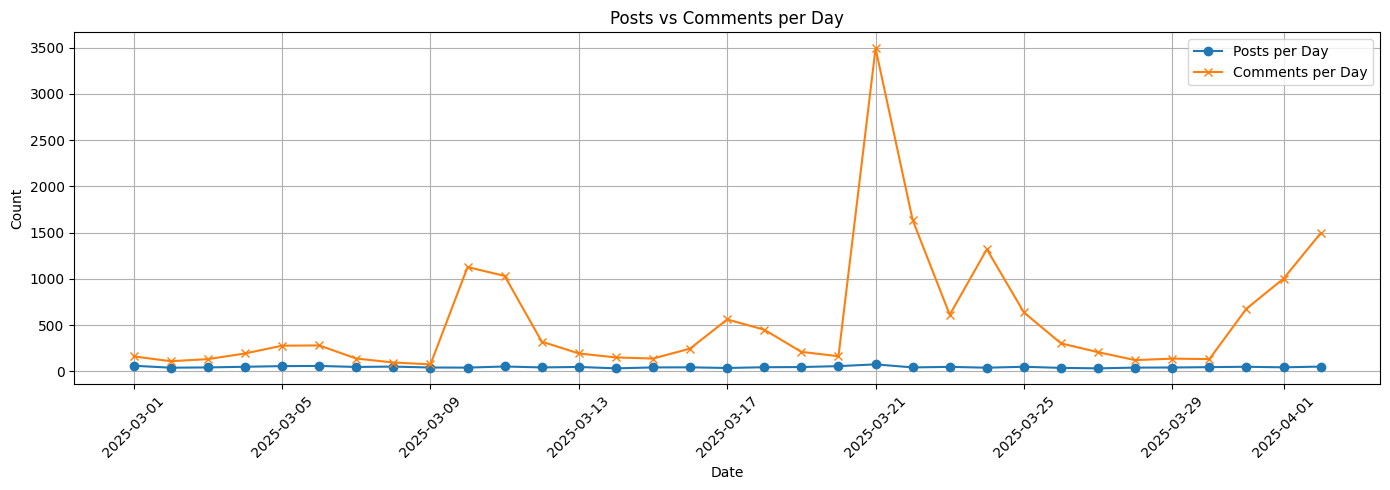

/tmp/ipython-input-56-3410537066.py:103: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-3410537066.py:103: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-3410537066.py:103: UserWarning: Glyph 129655 (\U0001fa77) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-3410537066.py:103: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-3410537066.py:103: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-3410537066.py:103: UserWarning: Glyph 129381 (\N{COCONUT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-56-3410537066.py:103: UserWarning: Glyph 127802 (\N{HIBISCUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-in

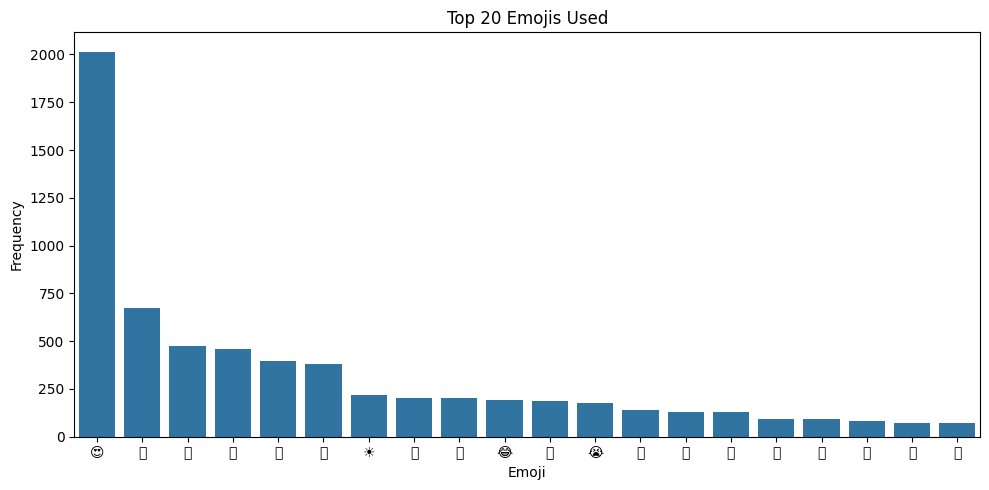

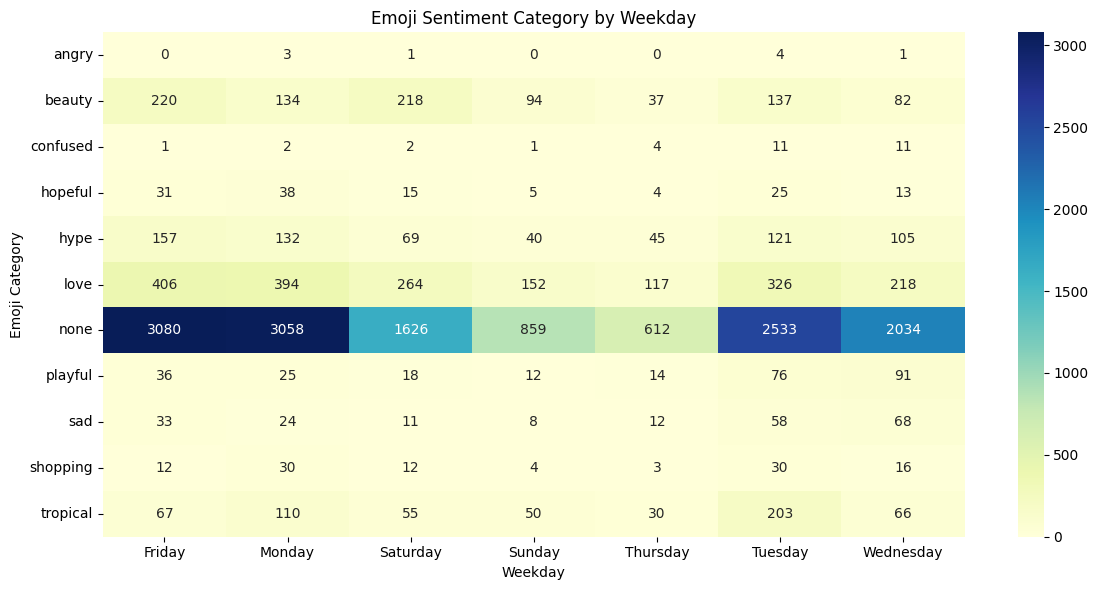

In [56]:
# treehut_analysis.py
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ------------------- Load and parse data -------------------
def load_and_parse_data(file_path):
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df = df.dropna(subset=['timestamp'])

    df['date'] = df['timestamp'].dt.date
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year
    df['weekday'] = df['timestamp'].dt.day_name()
    df['week'] = df['timestamp'].dt.isocalendar().week
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['time'] = df['timestamp'].dt.time
    return df

# ------------------- Clean comments -------------------
def clean_comments(df):
    def clean_text_keep_mentions(text):
        return re.sub(r"[^\w\s@]", "", str(text))
    df['clean_comment'] = df['comment_text'].apply(clean_text_keep_mentions)
    df['comment_length'] = df['comment_text'].str.len()
    return df

# ------------------- Extract mentions -------------------
def extract_mentions(df):
    df['mentions'] = df['comment_text'].str.findall(r'@\w+')
    top_mentions = df['mentions'].explode().value_counts().head(10)
    print("\nTop 10 Mentions:\n", top_mentions)
    return df

# ------------------- Extract emojis -------------------
def extract_emojis(df):
    emoji_categories = {
        'love': ['😍','🥰','❤️','💕','💖','💗','💓','💞','💝','💘','🫶','💌','❣'],
        'beauty': ['✨','💫','😻','🤩','👀','😋','💅','🧴','🩷','🫷'],
        'hype': ['🔥','🙌','👏','💯','🢌','💥','🎉','✅','‼','🎯','💀'],
        'tropical': ['🥥','🍊','🍍','🍓','🍋','🌸','🌺','🌷','🌻','🌿','🍒','☀','🌞','🌴','🌊','🌱'],
        'sad': ['😢','😭','🥺','🥹','😿'],
        'angry': ['😡','😠','🤬','😤','👿','😒','😾'],
        'confused': ['🤔','😕','🙃','😐','😶','🫤','🤷','🤦','🙄'],
        'playful': ['😂','🤣','😆','😅','😉','😜','😇','🤭','🥳','😄','😎','😁','😀'],
        'hopeful': ['🙏','🤞','☘','🍀'],
        'shopping': ['👍','💯','👌','✅','💵','🧴','💅','💍','💌']
    }
    emoji_to_category = {e: cat for cat, ems in emoji_categories.items() for e in ems}

    def extract_emoji_chars(text):
        return ''.join(char for char in str(text) if char in emoji_to_category)

    def categorize_emojis(emoji_str):
        found = set()
        for char in emoji_str:
            if char in emoji_to_category:
                found.add(emoji_to_category[char])
        return list(found) if found else ['none']

    df['emojis'] = df['comment_text'].apply(extract_emoji_chars)
    df['emoji_categories'] = df['emojis'].apply(categorize_emojis)
    return df

# ------------------- Weekly keyword trends -------------------
def weekly_keyword_trends(df):
    weekly_comments = df.groupby('week')['clean_comment'].apply(lambda texts: ' '.join(texts)).reset_index()
    weekly_comments['top_keywords'] = weekly_comments['clean_comment'].apply(lambda text: Counter(text.split()).most_common(10))
    print("\nTop Weekly Keywords:")
    print(weekly_comments[['week', 'top_keywords']])

# ------------------- Plotting -------------------
def plot_posts_vs_comments(df):
    posts_per_day = df.groupby('date')['media_id'].nunique()
    comments_per_day = df.groupby('date')['comment_text'].count()
    plt.figure(figsize=(14, 5))
    posts_per_day.plot(label='Posts per Day', marker='o')
    comments_per_day.plot(label='Comments per Day', marker='x')
    plt.title('Posts vs Comments per Day')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

def plot_top_emojis(df):
    all_emojis = ''.join(df['emojis'])
    emoji_counts = Counter(all_emojis)
    top_emojis = emoji_counts.most_common(20)
    emojis, counts = zip(*top_emojis)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(emojis), y=list(counts))
    plt.title('Top 20 Emojis Used')
    plt.xlabel('Emoji')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_emoji_sentiment_heatmap(df):
    heatmap_data = df.groupby('weekday')['emoji_categories'].apply(lambda x: x.explode().value_counts()).unstack().fillna(0)
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data.T, annot=True, fmt=".0f", cmap='YlGnBu')
    plt.title("Emoji Sentiment Category by Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Emoji Category")
    plt.tight_layout()
    plt.show()

# ------------------- Export CSV -------------------
def export_dataframe(df, path):
    df.to_csv(path, index=False)

# ------------------- Main -------------------
if __name__ == "__main__":
    df = load_and_parse_data("engagements.csv")
    df = clean_comments(df)
    df = extract_mentions(df)
    df = extract_emojis(df)
    weekly_keyword_trends(df)
    plot_posts_vs_comments(df)
    plot_top_emojis(df)
    plot_emoji_sentiment_heatmap(df)
    export_dataframe(df, "treehut_comment_analysis.csv")


In [52]:
import pandas as pd
from textblob import TextBlob

# Step 1: Ensure timestamp is in datetime format (optional if done earlier)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Step 2: Remove any existing caption_sentiment columns (to avoid duplicates)
df = df.drop(columns=[col for col in df.columns if "caption_sentiment" in col], errors='ignore')

# Step 3: Create a separate DataFrame with one caption per media_id
caption_df = df[['media_id', 'media_caption']].drop_duplicates()

# Step 4: Define sentiment analysis function using TextBlob
def get_caption_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity  # value from -1 (negative) to +1 (positive)
    except:
        return 0.0

# Step 5: Apply sentiment function to each media caption
caption_df['caption_sentiment'] = caption_df['media_caption'].apply(get_caption_sentiment)

# Step 6: Merge the sentiment score back into the main DataFrame
df = df.merge(caption_df[['media_id', 'caption_sentiment']], on='media_id', how='left')

# Step 7: Optional - Preview results
print(df[['media_id', 'media_caption', 'caption_sentiment']].drop_duplicates().head(10))

             media_id                                      media_caption  \
0    1090986906404998  Soft skin, soft life 🩷🌸🫧 get your hands on thi...   
1   17950254656929862  Why use one scrub when you can use them all at...   
2    1090109319826090  Morning routine with Tree Hut 🍊🫧 Now available...   
3    1098364052333950  Why use one scrub when you can use them all at...   
4    1083943630442659  Vanilla Serum-Infused Hand Wash: A sweet escap...   
5    1092654676238221  My go-to for waking up my skin! 🍊🫧 Click the l...   
6    1091806986322990  My go-to for waking up my skin! 🍊🫧 Click the l...   
7   18021315083459733  Orange you glad it’s giveaway time?! 🍊✨\n\nTha...   
8    1020629436774079                Which WintHER scrub fits your vibe✨   
12   1090857956417893  Soft skin, soft life 🩷🌸🫧 get your hands on thi...   

    caption_sentiment  
0            0.112500  
1            0.000000  
2            0.500000  
3            0.000000  
4            0.141667  
5            0.0000

In [53]:
df.groupby('weekday')['caption_sentiment'].mean().sort_values()

,caption_sentiment
weekday,
Friday,-0.008728
Saturday,0.045908
Sunday,0.105898
Wednesday,0.119949
Tuesday,0.157156
Thursday,0.168594
Monday,0.172092


In [54]:
df.groupby(pd.qcut(df['caption_sentiment'], 3))['emoji_categories'].apply(lambda x: x.explode().value_counts())

/tmp/ipython-input-54-1164120502.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['caption_sentiment'], 3))['emoji_categories'].apply(lambda x: x.explode().value_counts())


caption_sentiment          
(-0.876, -0.0333]  none        5151
                   love         702
                   beauty       392
                   hype         239
                   playful       73
                   sad           71
                   tropical      67
                   hopeful       46
                   shopping      17
                   confused      10
                   angry          3
(-0.0333, 0.169]   none        4586
                   love         471
                   beauty       205
                   hype         175
                   playful      121
                   tropical     112
                   sad           94
                   shopping      31
                   hopeful       29
                   confused      13
                   angry          5
(0.169, 1.0]       none        4148
                   love         704
                   tropical     402
                   hype         263
                   beauty       216
                   playful       78
                   shopping      59
                   hopeful       56
                   sad           49
                   confused       9
                   angry          1
Name: emoji_categories, dtype: int64

<Axes: xlabel='caption_sentiment', ylabel='comment_text'>

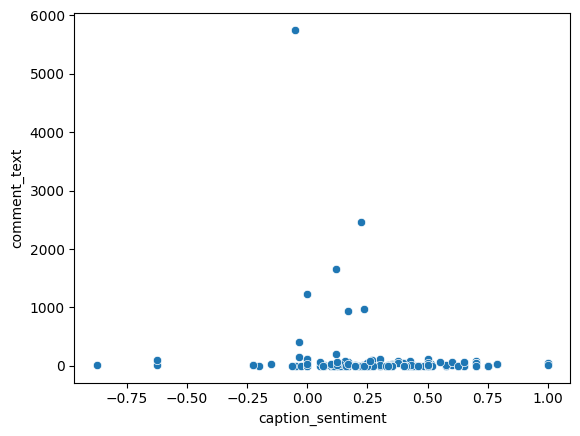

In [55]:
caption_stats = df.groupby('media_id').agg({
    'caption_sentiment': 'first',
    'comment_text': 'count'
}).reset_index()

sns.scatterplot(data=caption_stats, x='caption_sentiment', y='comment_text')